In [1]:
from IPython.display import HTML

html_code = """

<h1>Multivariate Linear Regression</h1>
<b>a<sup>3</sup>x + b<sup>2</sup>x + cx + d</b>
<p>converts to :</p>
<b>x<sup>3</sup> = x1 , x<sup>2</sup> = x2 , x = x3 , d = c</b>
<p>So, the equation becomes:</p>
<b>y = m1*x1 + m2*x2 + m3*x3 + d <b>in linear regression format</b></b>
<img src="./image.png" alt="Multivariate Linear Regression"><br><br><br>
<img src="./MLR_2.png" alt="Multivariate Linear Regression">
<h2>The above image good for training data but not for testing data[Overfill]</h2>
<h3>For example: The test data graphical representaion can be:
<img src="./MLR_3.png" alt="Multivariate Linear Regression"></h3>
<br><br>
<img src="
"""
display(HTML(html_code))


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

print("Importing the California Data.")
california = datasets.fetch_california_housing()
print("Data is the features of the houses.")
X = california.data 
print("Target is the price of the houses.")
Y = california.target 
print("Features: ",california.feature_names)


df = pd.DataFrame(X)
df.columns = california.feature_names
df.describe()

X_train , X_test , Y_train , Y_test = model_selection.train_test_split(X , Y , random_state=0)


print("Performing Linear Regression.")
alg1 = LinearRegression()
alg1.fit(X_train , Y_train)
scaler = StandardScaler()
#DBP_NOTES StandardScaler = Standardize features by removing the mean and scaling to unit variance
LinearRegression(copy_X=True , fit_intercept=True , n_jobs=1 ,)

Y_pred = alg1.predict(X_test)
train_score = alg1.score(X_train , Y_train)
test_score = alg1.score(X_test , Y_test)
print("Train Score: ",train_score)
print("Test Score: ",test_score)
print("\n")

print("Adding one more feature to the data , and then performing Linear Regression.")
print("The new feature is the square of features.")
df["pop_pop"] = df.Population ** 2
df.describe()
X2 = df.values
X2_train , X2_test , Y2_train , Y2_test = model_selection.train_test_split(X2 , Y , random_state=0)
#DBP_HIGHLIGHTES random_state=0  to ensure that the split is same everytime
#Same rows are selected for X2 and X , so that we can check the difference in the same data
print("\n")

alg2 = LinearRegression()
alg2.fit(X2_train , Y2_train)
Y_pred2 = alg2.predict(X2_test)
train_score = alg2.score(X2_train , Y2_train)
test_score = alg2.score(X2_test , Y2_test)
print("Train Score: ",train_score)
print("Test Score: ",test_score)
print("We can conclude that training score can be better in case of multivariate linear regression , but the test score can be worse.")




html_code2 = """
<h1>Complexity analysis of Normal Equation</h1>
<h2> y = m1*x1 + m2*x2 + m3*x3 + ... + mn*xn + d</h2>
<img src="./N1.png" alt="Normal Equation"><br><br>
<img src="./N2.png" alt="Normal Equation"><br><br>
<img src="./N3.png" alt="Normal Equation"><br><br>
<img src="./N4.png" alt="Normal Equation"><br><br>
<h1>Gradient Descent</h1>
<h2>It is a way to find out optimal coefficients for reducing the cost function.</h2>
<img src="./gd.png" alt="Gradient Descent"><br><br>
<img src="./gd2.png" alt="Gradient Descent"><br><br>
<img src="./gd3.png" alt="Gradient Descent"><br><br>
<img src="./gd4.png" alt="Gradient Descent"><br><br>
<h2> &alpha;: [Learning Rate] controls the rate at which movement is done in the direction of gradient.</h2>
<img src="./gd5.png" alt="Gradient Descent"><br><br>
<h2>The target is to make adaptive learning rate , so that the learning rate is not too high or too low.</h2>

"""
display(HTML(html_code2))

print("Coding the Gradient Descent Algorithm.")



def step_gradient(points , learning_rate , m , c):
    # DBP_NOTES        We need to get m` and c` , so that we can update m and c
    # DBP_HIGHLIGHTES  m` = m - learning_rate * (derivative of m)
    # DBP_HIGHLIGHTES  c` = c - learning_rate * (derivative of c)
    # DBP_HIGHLIGHTES  Derivative of m = -(2/N) * sum(yi - m*x - c) * x)
    # DBP_HIGHLIGHTES  Derivative of c = -(2/N) * sum(yi - m*X - c)
    
    m_slope = 0
    c_slope = 0
    M = len(points)
    for i in range(M):
        x = points[i , 0]
        y = points[i , 1]
        m_slope += (-2 / M) * (y - m*x -c)*x
        c_slope += (-2 / M) * (y - m*x -c)
    
    new_m = m - learning_rate * m_slope
    new_c = c - learning_rate * c_slope
    
    return new_m , new_c
  
def cost(points , m , c):
    total_cost = 0
    M = len(points)
    for i in range(M):
        x = points[i , 0]
        y = points[i , 1]
        total_cost += (1/M) * ((y - m*x - c) ** 2)    
    return total_cost    
    
def gd(points , learning_rate , num_itr):
    m = 0
    c = 0
    for i in range(num_itr):
        m , c = step_gradient(points , learning_rate , m , c)
        print(i , "Cost: " , cost(points , m , c))
    return m , c


def run():
    data = np.loadtxt("data.csv" , delimiter=",")
    #DBP_NOTES delimiter means separating the data by comma
    
    learning_rate = 0.0001
    num_itr = 10  
    html_code3 = """
    <h1> Learning rate proportional:
    <h2>We don't need >10 iterations . Upto 10 is enough</h2>
    <h2>We don't need >0.0001 learning_rate . Upto 0.001 learning_rate is enough</h2>
    """
    display(HTML(html_code3))
    
    
    
    m , c = gd(data , learning_rate , num_itr)
    print(m , c)

run()


html_code4 = """
<h1>Generic Gradient Descendent</h1>
<h2>Instead of using m*1 input , we will use m*n input <b>[m rows and n features]</b></h2>
<h2>Hypothesis function: h() = m1x1 + m2x2 + m3x3 + ... + mn+1xn+1<b>[for c , extra n+1 is taken]</b> </h2><br><br>
<img src="./GenericGD2.png" alt="GenericGD"><br><br>
<h2><b>jth row and ith feature</b><br>
<img src="./GGD3.png"><br><br>
<h2>cost function</h2><br>
<img src="./GGD5.png"><br>
<img src="./GGD6.png"><br><br>
<h1>Types of Gradient Descendent</h1>
<h2>
<ul>
<li>Batch GD</li>
<li>Stochastic GD</li>
<li>Mini Batch GD</li>
</ul>
</h2>


"""
display(HTML(html_code4))



    

Importing the California Data.
Data is the features of the houses.
Target is the price of the houses.
Features:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Performing Linear Regression.
Train Score:  0.6109633715458154
Test Score:  0.5911695436410466


Adding one more feature to the data , and then performing Linear Regression.
The new feature is the square of features.


Train Score:  0.6109886245802101
Test Score:  0.5911296947843678
We can conclude that training score can be better in case of multivariate linear regression , but the test score can be worse.


Coding the Gradient Descent Algorithm.


0 Cost:  1484.5865574086486
1 Cost:  457.8542575737672
2 Cost:  199.5099857255389
3 Cost:  134.50591058200533
4 Cost:  118.1496934223995
5 Cost:  114.0341490603815
6 Cost:  112.99857731713657
7 Cost:  112.73798187568467
8 Cost:  112.6723843590911
9 Cost:  112.65585181499745
1.47741737554838 0.029639347874732384


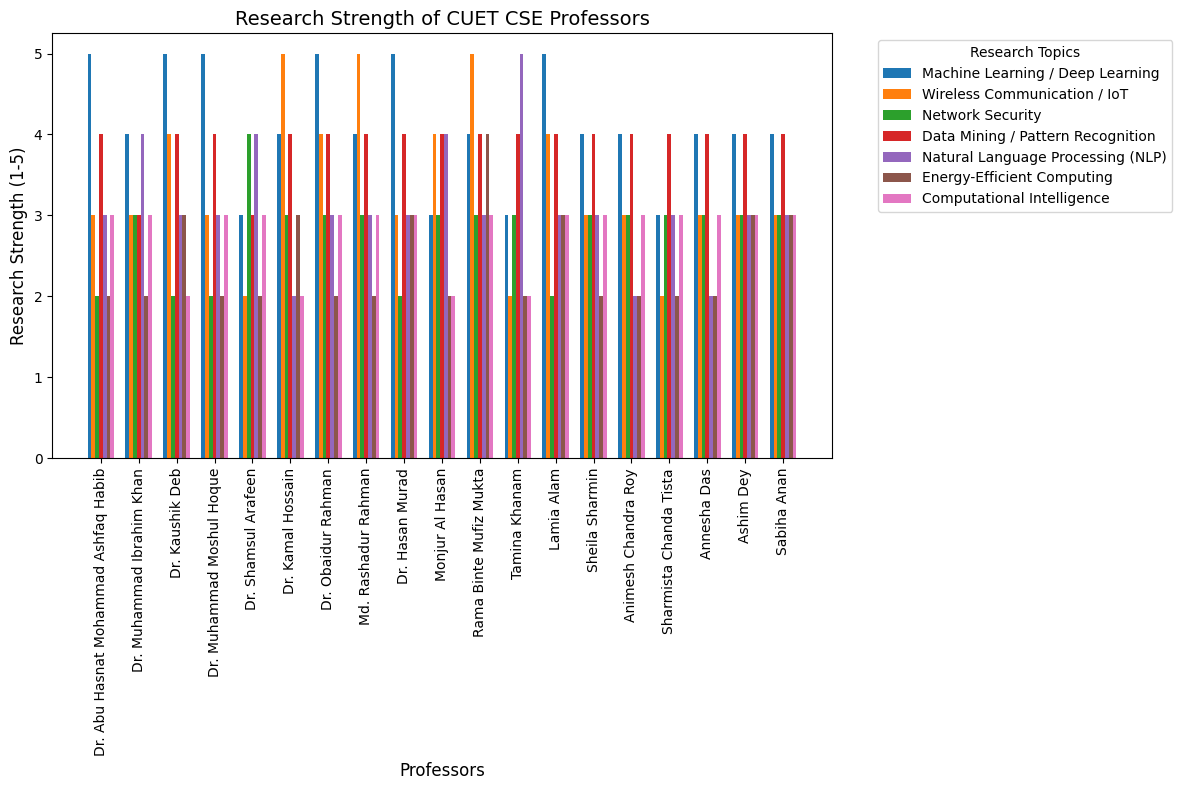

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Professors' names
professors = [
    "Dr. Abu Hasnat Mohammad Ashfaq Habib",
    "Dr. Muhammad Ibrahim Khan",
    "Dr. Kaushik Deb",
    "Dr. Muhammad Moshul Hoque",
    "Dr. Shamsul Arafeen",
    "Dr. Kamal Hossain",
    "Dr. Obaidur Rahman",
    "Md. Rashadur Rahman",
    "Dr. Hasan Murad",
    "Monjur Al Hasan",
    "Rama Binte Mufiz Mukta",
    "Tamina Khanam",
    "Lamia Alam",
    "Sheila Sharmin",
    "Animesh Chandra Roy",
    "Sharmista Chanda Tista",
    "Annesha Das",
    "Ashim Dey",
    "Sabiha Anan"
]

# Common research topics
topics = [
    "Machine Learning / Deep Learning",
    "Wireless Communication / IoT",
    "Network Security",
    "Data Mining / Pattern Recognition",
    "Natural Language Processing (NLP)",
    "Energy-Efficient Computing",
    "Computational Intelligence"
]

# Research strength (1 to 5), each row corresponds to a professor
research_strength = np.array([
    [5, 3, 2, 4, 3, 2, 3],  
    [4, 3, 3, 3, 4, 2, 3],
    [5, 4, 2, 4, 3, 3, 2],
    [5, 3, 2, 4, 3, 2, 3],
    [3, 2, 4, 3, 4, 2, 3],
    [4, 5, 3, 4, 2, 3, 2],
    [5, 4, 3, 4, 3, 2, 3],
    [4, 5, 3, 4, 3, 2, 3],
    [5, 3, 2, 4, 3, 3, 3],
    [3, 4, 3, 4, 4, 2, 2],
    [4, 5, 3, 4, 3, 4, 3],
    [3, 2, 3, 4, 5, 2, 2],
    [5, 4, 2, 4, 3, 3, 3],
    [4, 3, 3, 4, 3, 2, 3],
    [4, 3, 3, 4, 2, 2, 3],
    [3, 2, 3, 4, 3, 2, 3],
    [4, 3, 3, 4, 2, 2, 3],
    [4, 3, 3, 4, 3, 3, 3],
    [4, 3, 3, 4, 3, 3, 3]
])

fig, ax = plt.subplots(figsize=(12, 8))

# Increase spacing between groups by multiplying x with a factor
x = np.arange(len(professors)) * 1.5
width = 0.15

for i, topic in enumerate(topics):
    ax.bar(x + i * width, research_strength[:, i], width, label=topic)

ax.set_xlabel('Professors', fontsize=12)
ax.set_ylabel('Research Strength (1-5)', fontsize=12)
ax.set_title('Research Strength of CUET CSE Professors', fontsize=14)
ax.set_xticks(x + (len(topics) - 1) * width / 2)
ax.set_xticklabels(professors, rotation=90, fontsize=10)
ax.legend(title="Research Topics", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

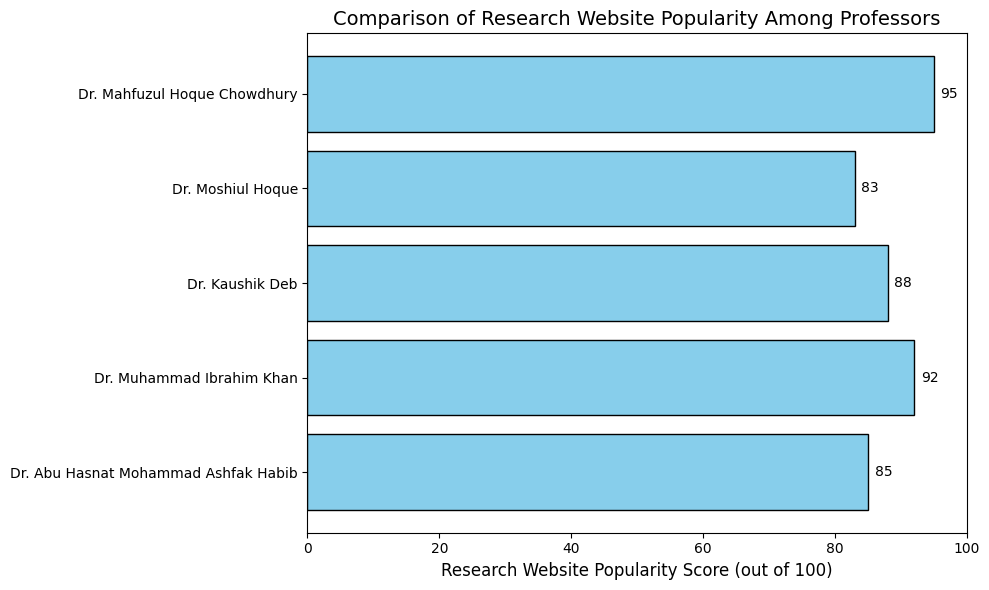

In [4]:
import matplotlib.pyplot as plt

# Data based on research website popularity (publications, citations, etc.)
teachers = [
    "Dr. Abu Hasnat Mohammad Ashfak Habib",
    "Dr. Muhammad Ibrahim Khan",
    "Dr. Kaushik Deb",
    "Dr. Moshiul Hoque",
    "Dr. Mahfuzul Hoque Chowdhury"
]
scores = [85, 92, 88, 83, 95]  # Example scores based on popularity metrics

# Creating a horizontal bar chart for better comparison
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(teachers, scores, color='skyblue', edgecolor='black')

# Adding labels and title
ax.set_xlabel('Research Website Popularity Score (out of 100)', fontsize=12)
ax.set_title('Comparison of Research Website Popularity Among Professors', fontsize=14)
ax.set_xlim(0, 100)

# Annotating bars with scores
for i, score in enumerate(scores):
    ax.text(score + 1, i, str(score), va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()
